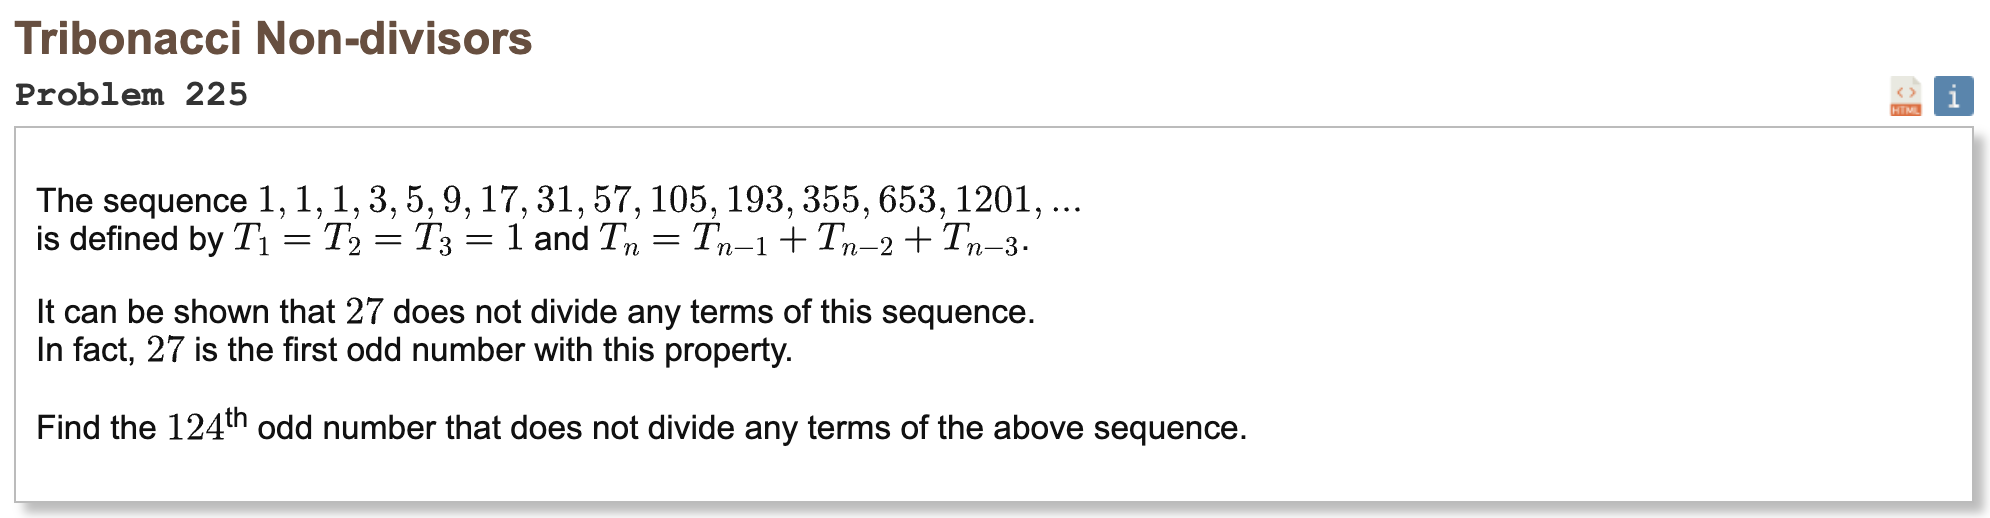

## Initial approach

* work modulo an odd number n, because divisibility only depends on remainders
* the sequence step only depends on the last three values, so the whole process is a repeating state machine
* start from the state (1, 1, 1) modulo n and keep generating the next value from the previous three
* if any generated value becomes 0 modulo n, then n divides a term, so n is not what we want
* if a state repeats before we ever see 0, the sequence will loop forever without 0, so n never divides any term
* scan odd numbers in order, count the ones that never hit 0, stop at the 124th and output it

In [1]:
def never_divides_any_term(n):
    a = 1 % n
    b = 1 % n
    c = 1 % n
    seen = set()
    while (a, b, c) not in seen:
        if c == 0:
            return False
        seen.add((a, b, c))
        a, b, c = b, c, (a + b + c) % n
    return True

def solve(target_index):
    count = 0
    x = 1
    while True:
        x += 2
        if never_divides_any_term(x):
            count += 1
            if count == target_index:
                return x

In [2]:
%%time
result = solve(124)
print("Result:", result)

Result: 2009
CPU times: user 880 ms, sys: 29.9 ms, total: 910 ms
Wall time: 912 ms
